# Example notebook for basic analysis of low loss SI data
### Using low level functions from pyTEMlib eels tools
Written by Austin Houston on 12/01/2023

## Import Libraries

In [23]:
import sys

# the line below is can be removed after update of pyTEMlib
sys.path.insert(0,'/Users/austin/Documents/GitHub/pyTEMlib')

import numpy as np
import matplotlib.pylab as plt
%matplotlib widget

import pyTEMlib
import pyTEMlib.file_tools as ft
from pyTEMlib import eels_tools
print(pyTEMlib.__version__)

0.2023.9.19.dev1


## Load example data

Use map_double_grain_boundary.dm4

In [24]:
fileWidget = ft.FileWidget('../../example_data/')

In [25]:
datasets = fileWidget.datasets

image = datasets['Channel_000']
survey = datasets['Channel_001']
spectrum_image = datasets['Channel_002']

eels_dataset = spectrum_image

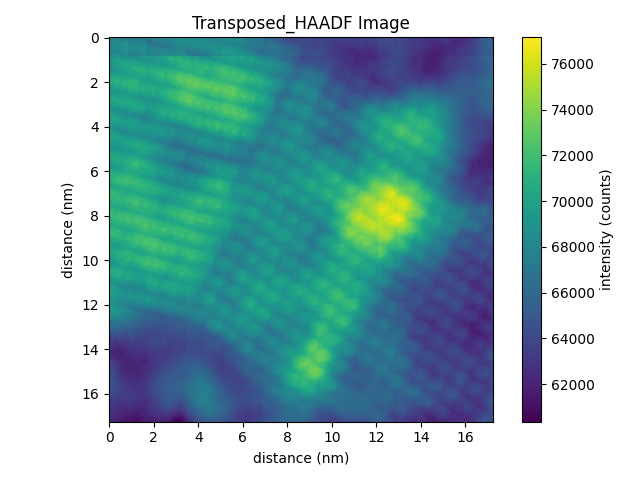

In [26]:
view = survey.T.plot()

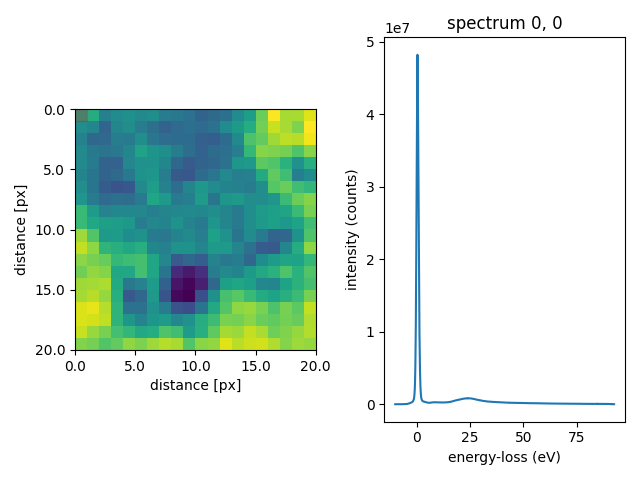

In [32]:
view = eels_dataset.plot()

## Shift all ZLP to 0

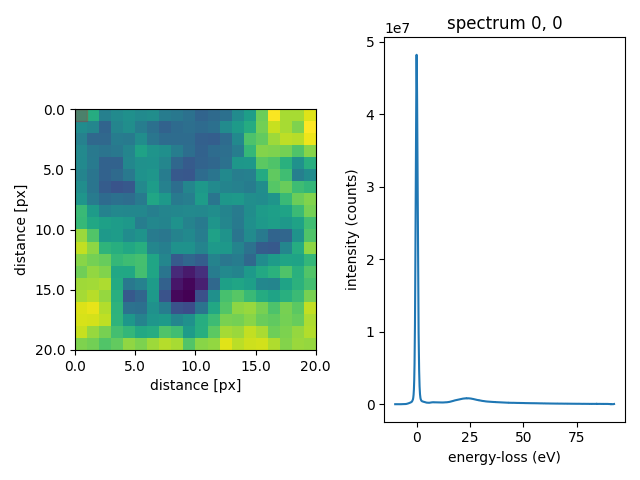

In [28]:
aligned_dset, shifts = eels_tools.align_zlps(eels_dataset, return_shifts=True)

view = aligned_dset.plot()

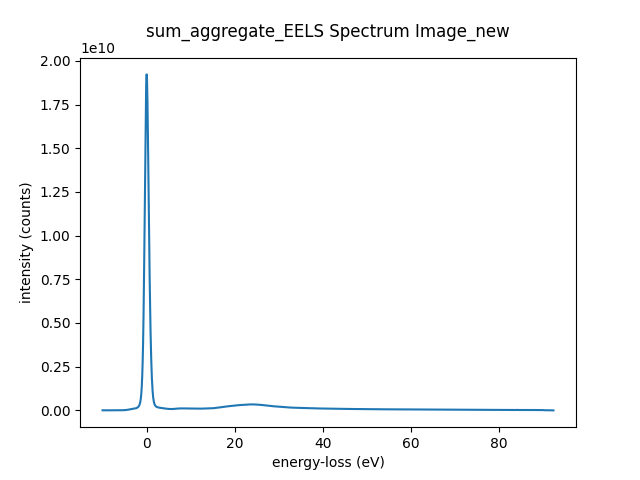

In [29]:
sum_spec = aligned_dset.sum(axis=(0,1))
sum_spec.data_type = 'spectrum'

view = sum_spec.plot()

## Fit and map plasmon shifts

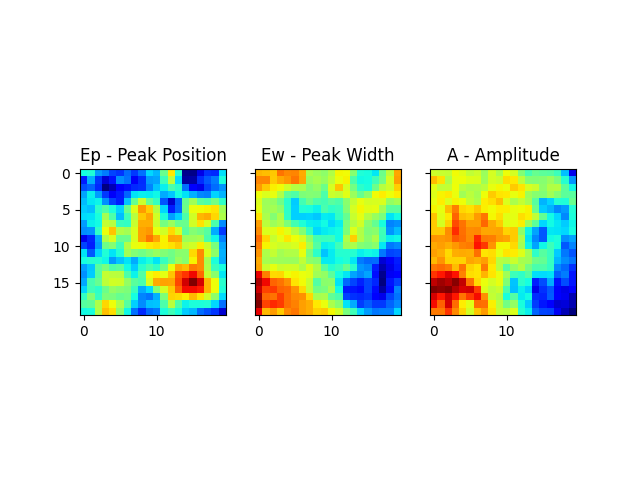

In [30]:
fitted_plasmon_dataset = eels_tools.fit_plasmon(aligned_dset, 15, 35, plot_result = True)